# Problem 1.1 Birthday Paradox

Problem description:
How many people do you need in a room before there’s a 50% chance two share the same birthday?

## Exact calculation

Exact solution from pen & paper:
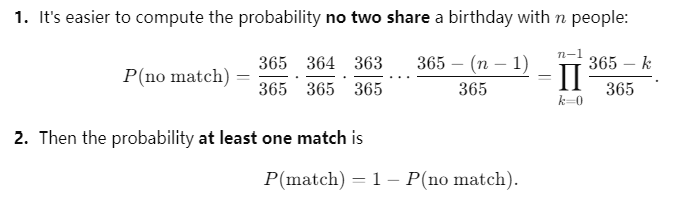

In [ ]:
def p_no_match(n, days=365):
    """Exact probability that no two of n people share a birthday."""
    p = 1.0
    for k in range(n):
        p *= (days - k) / days
    return p

def p_match(n, days=365):
    return 1 - p_no_match(n, days)

## Monte Carlo Simulation

“Monte Carlo is a way to estimate probabilities by simulating random events many times and counting how often something happens.”

In [6]:
# birthday_paradox.py
import random
import math

def monty_carlo_birthday(n, trials=10000, days=365, seed=None):
    """Monte Carlo estimate of P(at least one shared birthday)."""
    count = 0
    for _ in range(trials):
        birthdays = [random.randrange(days) for _ in range(n)]
        if len(set(birthdays)) < len(birthdays):
            count += 1
    return count / trials


In [7]:
for n in [22, 23, 24]:
    est = monty_carlo_birthday(n, seed=1)
    print(f"n={n:2d}  Monte Carlo = {est:.6f}")


n=22  Monte Carlo = 0.481400
n=23  Monte Carlo = 0.512800
n=24  Monte Carlo = 0.537900


### Another version of simulation

In [4]:
import random

def has_duplicate_birthday(n):
    birthdays = [random.randint(1, 365) for _ in range(n)]
    return len(birthdays) != len(set(birthdays))

def simulate(n, trials=10000):
    count = sum(has_duplicate_birthday(n) for _ in range(trials))
    return count / trials

for n in [10, 20, 23, 30, 40, 50]:
    print(n, simulate(n))

10 0.1156
20 0.4149
23 0.5095
30 0.7104
40 0.8914
50 0.9726


## All together!

In [5]:
# birthday_paradox.py
import random
import math

def p_no_match(n, days=365):
    """Exact probability that no two of n people share a birthday."""
    p = 1.0
    for k in range(n):
        p *= (days - k) / days
    return p

def p_match(n, days=365):
    return 1 - p_no_match(n, days)

def monty_carlo_birthday(n, trials=10000, days=365, seed=None):
    """Monte Carlo estimate of P(at least one shared birthday)."""
    if seed is not None:
        random.seed(seed)
    count = 0
    for _ in range(trials):
        birthdays = [random.randrange(days) for _ in range(n)]
        if len(set(birthdays)) < len(birthdays):
            count += 1
    return count / trials

if __name__ == "__main__":
    for n in [20, 22, 23, 24, 30]:
        print(f"n={n:2d}  P(match) exact = {p_match(n):.6f}")

    # Monte Carlo quick check
    trials = 50000
    for n in [22, 23, 24]:
        est = monty_carlo_birthday(n, trials=trials, seed=1)
        print(f"n={n:2d}  Monte Carlo (trials={trials}) = {est:.6f}")


n=20  P(match) exact = 0.411438
n=22  P(match) exact = 0.475695
n=23  P(match) exact = 0.507297
n=24  P(match) exact = 0.538344
n=30  P(match) exact = 0.706316
n=22  Monte Carlo (trials=50000) = 0.478880
n=23  Monte Carlo (trials=50000) = 0.508180
n=24  Monte Carlo (trials=50000) = 0.538800


## Problem 1.2 Birthmonth Paradox


Problem description:
How many people do you need in a room before there’s a 50% chance two share the same birthmonth?

## Exact calculation

In [11]:
def p_no_match(n, months=12):
    """Exact probability that no two of n people share a birthmonth."""
    p = 1.0
    for k in range(n):
        p *= (months - k) / months
    return p

def p_match(n, months=12):
    return 1 - p_no_match(n, months)

for n in [2,3,4,5]:
    print(f"n={n:2d}  P(match) exact = {p_match(n):.6f}")

n= 2  P(match) exact = 0.083333
n= 3  P(match) exact = 0.236111
n= 4  P(match) exact = 0.427083
n= 5  P(match) exact = 0.618056


## Monte Carlo Simulation

In [7]:
def same_month_sim(n, trials=20000):
    count = 0
    for _ in range(trials):
        months = [random.randrange(12) for _ in range(n)]
        if len(months) != len(set(months)):
            count += 1
    return count / trials

for n in [3, 4, 5, 10]:
    print(n, same_month_sim(n))

3 0.23805
4 0.42455
5 0.62005
10 0.99595


# Problem 1.3 The “Shared Initials” Paradox

Problem description:

In a room of n people, what’s the probability that at least two people share the same initials (e.g., J.S., M.T.)? 

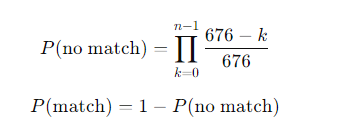

In [12]:
def p_no_match(n, initials=676):
    """Exact probability that no two of n people share a birthmonth."""
    p = 1.0
    for k in range(n):
        p *= (initials - k) / initials
    return p

def p_match(n, initials=676):
    return 1 - p_no_match(n, initials)

for n in [10, 20, 30, 40]:
    print(f"n={n:2d}  P(match) exact = {p_match(n):.6f}")

n=10  P(match) exact = 0.064695
n=20  P(match) exact = 0.247088
n=30  P(match) exact = 0.479550
n=40  P(match) exact = 0.691798


In [10]:
import random

def shared_initials_sim(n, trials=20000):
    count = 0
    for _ in range(trials):
        initials = [random.randrange(676) for _ in range(n)]
        if len(initials) != len(set(initials)):
            count += 1
    return count / trials

for n in [10, 20, 30, 40]:
    print(n, shared_initials_sim(n))

10 0.0636
20 0.24305
30 0.48155
40 0.69235


# Problem 2.1 Librarian Or Farmer?
Problem description:
We are given a description of Steven:

“Very shy and withdrawn,   helpful but with little interest in people or the world of reality. A meek and tidy soul, he has a need for a order and structure, and a passion for detail.”

We want to judge whether Steven is more likely to be:

L = a librarian, or

F = a farmer

## Solution

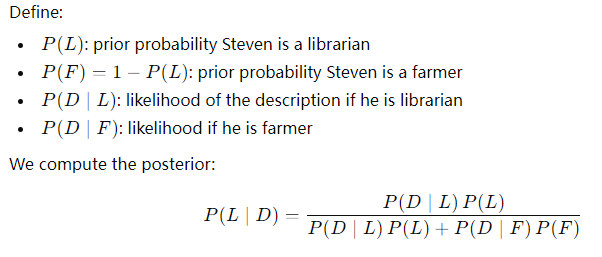

In [19]:
def bayes_posterior_L(prior_L, like_D_given_L, like_D_given_F):
    """Exact Bayes posterior P(L | D)."""
    prior_F = 1 - prior_L
    numerator = like_D_given_L * prior_L
    denominator = numerator + like_D_given_F * prior_F
    return numerator / denominator

In [20]:
def simulate_posterior(prior_L, like_L, like_F, trials=200000, seed=0):
    """Monte Carlo simulation of P(L | D)."""
    random.seed(seed)

    count_L_and_D = 0
    count_D = 0

    for _ in range(trials):
        # sample true category
        is_L = random.random() < prior_L

        # generate whether description matches
        if is_L:
            D = random.random() < like_L
        else:
            D = random.random() < like_F

        if D:
            count_D += 1
            if is_L:
                count_L_and_D += 1

    return count_L_and_D / count_D


In [21]:
# Example values
prior_L = 0.10
like_L = 0.90
like_F = 0.20

post_exact = bayes_posterior_L(prior_L, like_L, like_F)
post_sim = simulate_posterior(prior_L, like_L, like_F)

print("Exact Bayes P(L | description): ", round(post_exact, 4))
print("Monte Carlo approx:             ", round(post_sim, 4))


Exact Bayes P(L | description):  0.3333
Monte Carlo approx:              0.3361
